## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np
from sklearn import datasets, linear_model

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_complete = study_results.merge(mouse_metadata,left_on="Mouse ID",right_on="Mouse ID", how="outer").sort_values('Timepoint')

# Display the data table for preview
display(study_complete)

Matplotlib created a temporary config/cache directory at C:\Users\DMOSTA~1\AppData\Local\Temp\matplotlib-0zaj5c7o because the default path (U:\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1460,w584,0,45.000000,0,Infubinol,Male,3,29
1006,p136,0,45.000000,0,Zoniferol,Female,5,28
461,a411,0,45.000000,0,Ramicane,Male,3,22
1467,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...
514,k403,45,22.050126,1,Ramicane,Male,21,16
279,z581,45,62.754451,3,Infubinol,Female,24,25
1774,v923,45,40.658124,2,Capomulin,Female,19,21
1764,j119,45,38.125164,1,Capomulin,Female,7,23


In [2]:
# Checking the number of mice.

mice = study_complete[['Mouse ID']].nunique()
print(mice)


Mouse ID    249
dtype: int64


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Mice_filtered = study_complete[['Mouse ID','Timepoint']]

Mice_duplicated= Mice_filtered[Mice_filtered.duplicated(['Mouse ID','Timepoint'])]

display(Mice_duplicated)

,Mouse ID,Timepoint
861,g989,0
862,g989,5
864,g989,10
867,g989,15
868,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


Mice_duplicated_all = study_complete[study_complete.duplicated(['Mouse ID','Timepoint'],keep=False)]
                                 
display(Mice_duplicated_all)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_clean_mice= study_complete.drop_duplicates(["Mouse ID","Tumor Volume (mm3)"])

study_clean= study_clean_mice[study_clean_mice['Mouse ID'] != 'g989']

display(study_clean)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1460,w584,0,45.000000,0,Infubinol,Male,3,29
1006,p136,0,45.000000,0,Zoniferol,Female,5,28
461,a411,0,45.000000,0,Ramicane,Male,3,22
1467,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...
514,k403,45,22.050126,1,Ramicane,Male,21,16
279,z581,45,62.754451,3,Infubinol,Female,24,25
1774,v923,45,40.658124,2,Capomulin,Female,19,21
1764,j119,45,38.125164,1,Capomulin,Female,7,23


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_clean = study_clean[['Mouse ID']].nunique()
print(mice_clean)

Mouse ID    248
dtype: int64


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_mean_df= study_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean().rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) [mean]"})
drug_median_df= study_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median().rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) [median]"})
drug_var_df= study_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var().rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) [variance]"})
drug_std_df= study_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std().rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) [std]"})
drug_sem_df= study_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem().rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) [sem]"})


# We create a list with all the DataFrames we previuosly prepared for analysis  
drug_stats = [drug_mean_df, drug_median_df, drug_var_df, drug_std_df, drug_sem_df]

# We create our Dataframe for data analysis by school name, merging all the Dataframes previously made and using School Name as the index.
drug_summary_stats = reduce(lambda left,right: pd.merge(left,right,on=['Drug Regimen'],how='outer'),drug_stats)


display(drug_summary_stats)


,Tumor Volume (mm3) [mean],Tumor Volume (mm3) [median],Tumor Volume (mm3) [variance],Tumor Volume (mm3) [std],Tumor Volume (mm3) [sem]
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_summary_stats_df_agg = study_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg({'Tumor Volume (mm3)' : ['mean', 'median','var','std','sem']})

display(drug_summary_stats_df_agg)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

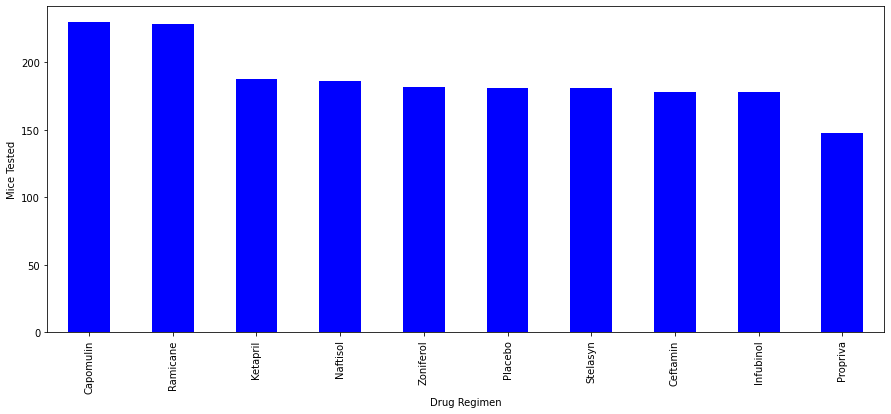

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_drug_summary_bar = study_clean[["Drug Regimen","Timepoint"]].groupby("Drug Regimen").count().sort_values(by="Timepoint", ascending = False)

timepoints_drug_summary_bar.plot(kind="bar", legend=False, ylabel="Mice Tested", figsize=(15,6), color="blue")

plt.show()



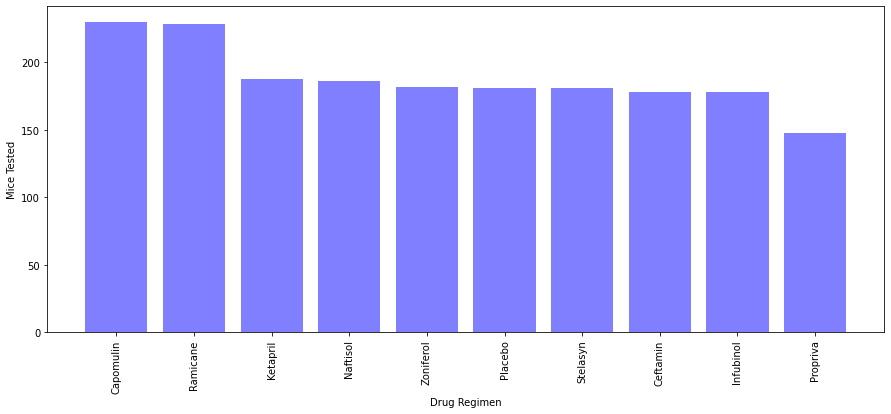

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints_drug_summary_pybar = study_clean[["Drug Regimen","Timepoint"]].groupby("Drug Regimen").count().sort_values(by="Timepoint", ascending = False)

x_axis = np.arange(len(timepoints_drug_summary_pybar))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,6))
plt.bar(x_axis, timepoints_drug_summary_pybar["Timepoint"], width=0.8 ,align= "center",color="blue",alpha=0.5)
plt.xticks(tick_locations, timepoints_drug_summary_pybar.index, rotation="vertical")


plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.show()




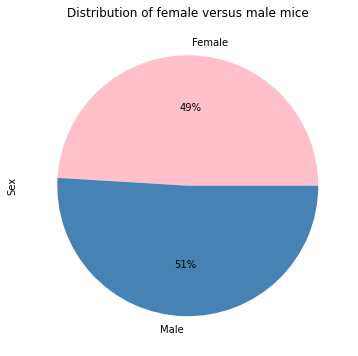

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

timepoints_sex_summary_pie = study_clean[["Sex","Timepoint"]].groupby("Sex").count()

timepoints_sex_summary_pie.plot(kind="pie", y="Timepoint",autopct='%1.0f%%',title='Distribution of female versus male mice',legend=False,figsize=(15,6), colors=['pink', 'steelblue'], ylabel="Sex")


plt.show()



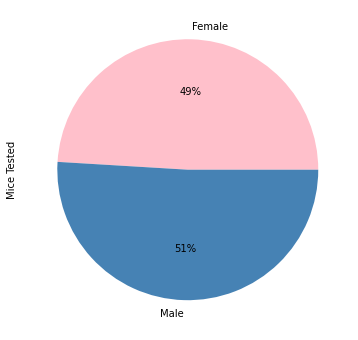

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

timepoints_sex_summary_pypie = study_clean[["Sex","Timepoint"]].groupby("Sex").count()

#x_axis = np.arange(len(timepoints_sex_summary_pypie))

plt.figure(figsize=(15,6))
plt.pie(timepoints_sex_summary_pypie["Timepoint"],autopct=('%1.0f%%'),labels=["Female","Male"],colors=['pink', 'steelblue'])

plt.ylabel("Mice Tested")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Mice_tumor_sorted = study_clean[['Mouse ID',"Tumor Volume (mm3)","Drug Regimen"]].sort_values("Tumor Volume (mm3)")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Mice_tumor_filtered = Mice_tumor_sorted.drop_duplicates(['Mouse ID'], keep='last').set_index('Mouse ID')


display(Mice_tumor_filtered)


,Tumor Volume (mm3),Drug Regimen
Mouse ID,,
t573,45.000000,Ceftamin
u153,45.000000,Ceftamin
d133,45.000000,Zoniferol
v199,45.000000,Naftisol
n482,45.000000,Propriva
...,...,...
t724,75.113288,Naftisol
m269,75.123690,Stelasyn
p189,75.294936,Ketapril


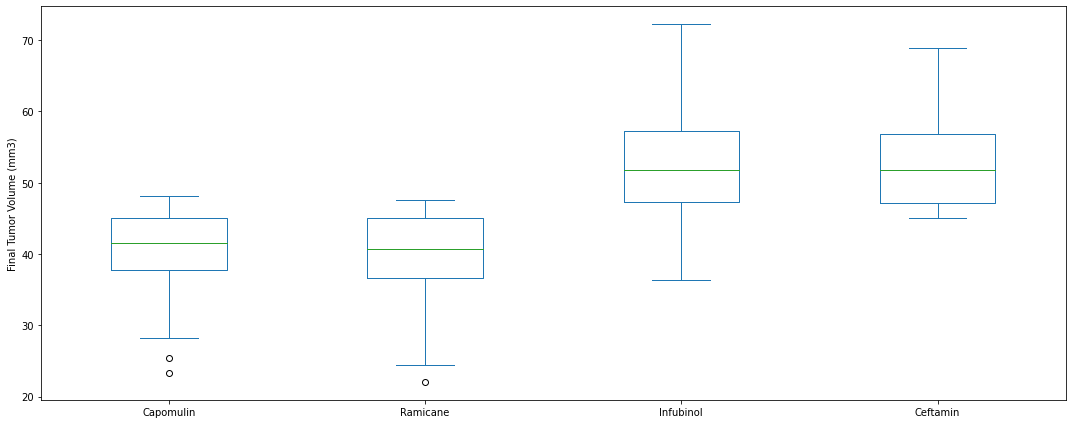

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

Mice_tumor_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

Mice_tumor_data_list = ([[],[],[],[]])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for each, drug in enumerate(Mice_tumor_drugs):
    Mice_tumor_separated = study_clean.loc[(study_clean["Drug Regimen"]==drug)]
    Mice_tumor_data_list[each]= Mice_tumor_separated["Tumor Volume (mm3)"]
    
    # add subset 
    
    Mice_tumor_data = {
    "Capomulin": Mice_tumor_data_list[0],
    "Ramicane": Mice_tumor_data_list[1],
    "Infubinol": Mice_tumor_data_list[2],
    "Ceftamin": Mice_tumor_data_list[3]       
}
    

# Set the figure size
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame(Mice_tumor_data)

# Plot the dataframe
ax = data[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].plot(kind='box', ylabel= 'Final Tumor Volume (mm3)')

# Display the plot
plt.show()


    # Determine outliers using upper and lower bounds
    


    

### Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

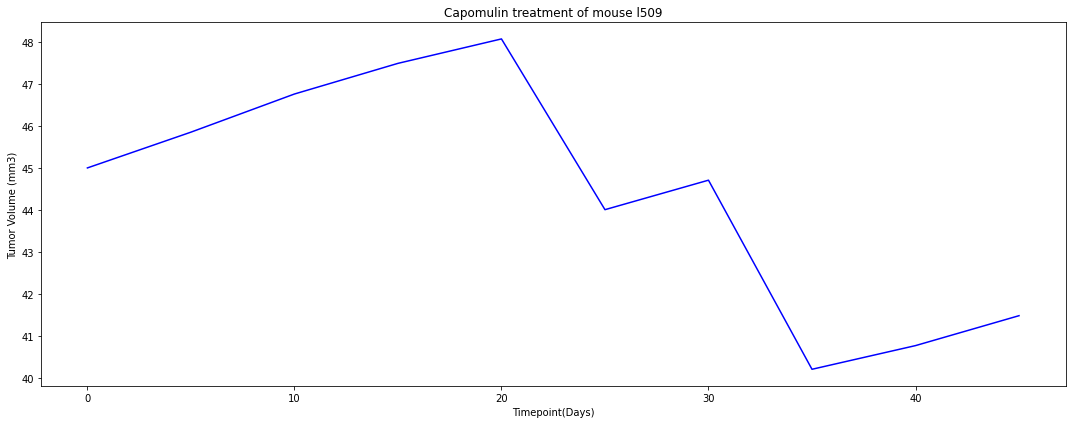

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Mouse_Line_ID_DF = study_clean.loc[(study_clean["Mouse ID"]=="l509")]
Mouse_Line_Data = Mouse_Line_ID_DF[["Timepoint","Tumor Volume (mm3)"]].set_index("Timepoint")

Mouse_Line_Data.plot(legend=False,xlabel="Timepoint(Days)", ylabel="Tumor Volume (mm3)", figsize=(15,6), color="blue", title="Capomulin treatment of mouse l509")

plt.show()


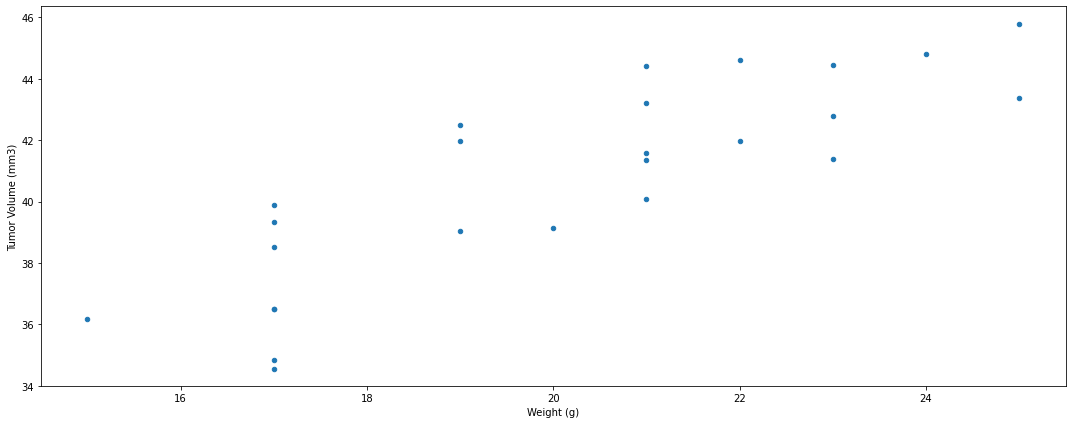

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Mouse_Capomulin_DF = study_clean.loc[(study_clean["Drug Regimen"]=="Capomulin")]

Mouse_Scatter_Data= Mouse_Capomulin_DF[["Weight (g)","Tumor Volume (mm3)","Mouse ID"]].groupby("Mouse ID").mean()

Mouse_Scatter_Plot = Mouse_Scatter_Data.plot.scatter(x="Weight (g)", y ="Tumor Volume (mm3)")

plt.show()



## Correlation and Regression

0.8419363424694722


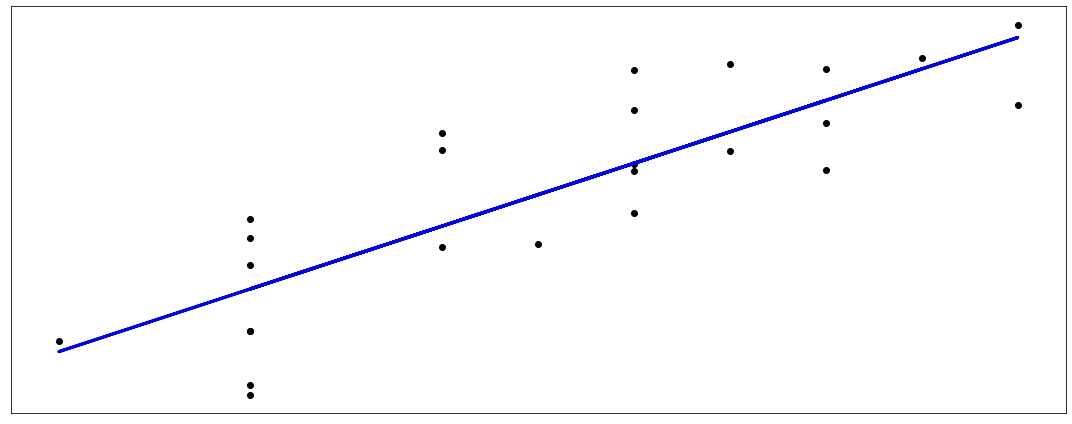

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Mouse_Corr_Capomulin_DF = study_clean.loc[(study_clean["Drug Regimen"]=="Capomulin")]

Mouse_Corr_Data= Mouse_Capomulin_DF[["Weight (g)","Tumor Volume (mm3)","Mouse ID"]].groupby("Mouse ID").mean()

print(Mouse_Corr_Data["Weight (g)"].corr(Mouse_Corr_Data["Tumor Volume (mm3)"]))

length = 25

x = Mouse_Corr_Data["Weight (g)"].values
y = Mouse_Corr_Data["Tumor Volume (mm3)"].values

x = x.reshape(length, 1)
y = y.reshape(length, 1)


regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
#See sklearn line

#print(x)
